<h1><center> Factorisation QR </center></h1>

Soit $A \in \mathcal{M}_n(\mathbb{R})$, une factorisation QR de cette matrice consiste à déterminer : \medskip
<ul>
    <li>une matrice $Q\in \mathcal{M}_n(\mathbb{R})$ orthogonale </li>
    <li>une matrice $R\in \mathcal{M}_n(\mathbb{R})$ trinagulaire supérieure </li>
</ul>
telles que $A=QR$. Une telle factorisation existe toujours, et est unique lorsque $A$ est inversible\footnote{Pour une preuve complète, voir P.G. Ciarlet "Introduction à l'analyse numérique et à l'optimisation"}. Dans le cas inversible, la factorisation QR permet une résolution rapide des systèmes du type $AX=B$ en : 
<ul>
    <li>résolvant $QY=B$, dont la solution est trivialement $Y= ~^t  QB$ </li>
    <li>résolvant $RX=Y$, à l'aide de l'algorithme de remontée pour les systèmes triangulaires vu au dernier T.P. </li>
</ul>
Le but de ce T.P. est d'étudier des algorithmes permettant de calculer la factorisation $QR$ d'une matrice $A$ donnée.


<h2> Méthode de Gram-Schmidt </h2>
<p>Une première méthode pour calculer la factorisation QR d'une matrice consiste à effectuer une orthogonalisation de Gram-Schmidt sur les colonnes de cette dernière. Considérons $A=(v_1,v_2, ... , v_n)$ où les $(v_i)_{i=1,..n}$ sont des vecteurs colonne. Le procédé de Gram-Schmidt permet de transformer une famille $\{v_1,v_2,...,v_n \}$ en une famille $\{ e_1, e_2, ..., e_n \}$ orthonormée : </p>
\begin{align*}
&u_1=v_1 &e_1=\dfrac{u_1}{|u_1|} \\
&u_2=v_2 - <e_1,v_2>e_1 &e_2=\dfrac{u_2}{|u_2|} \\
&u_3=v_3 - <e_1,v_3>e_1 - <e_2,v_3>e_2 &e_3=\dfrac{u_3}{|u_3|} \\
& \vdots & \\
&u_n = v_n - \sum_{i=1}^{n-1} <e_i,v_n> e_i & e_n=\dfrac{u_n}{|u_n|}  \\
\end{align*}
<p>Il alors est possible d'exprimer les colonnes de $A$ directement en fonction des $(e_i)_{i=1..n}$  (on remarque que : $u_i \cdot e_i = |u_i|= v_i \cdot e_i$): </p>
\begin{align*}
&v_1=<e_1,v_1> e_1  \\
&v_2=<e_2,v_2> e_2 + <e_1,v_2>e_1  \\
&v_3=<e_3,v_3> e_3 + <e_1,v_3>e_1 - <e_2,v_3>e_2  \\
& \vdots & \\
&v_n = <e_n,v_n> + \sum_{i=1}^{n-1} <e_i,v_n> e_i  
\end{align*}
<p>En ré-écrivant ceci sous forme matricielle, on obtient: </p>
\begin{equation*}
A=\underbrace{\begin{pmatrix} e_1 & e_2 & e_3 & ... & e_n \end{pmatrix}}_Q \underbrace{\begin{pmatrix} <e_1,v_1> & <e_1,v_2> & <e_1,v_3> & ... & <e_1,v_n> \\ 
0 & <e_2,v_2> & <e_2,v_3> & ... & <e_2,v_n> \\
0 & 0 & <e_3,v_3> & ... & <e_3,v_n> \\
\vdots & \vdots& \vdots & \ddots & \vdots\\
0 & 0 & 0 & ... & <e_n,v_n> \end{pmatrix}}_R
\end{equation*}


1- Ecrire une fonction python <i>Q=GramSchmidt(A)</i> réalisant l'orthogonalisation de Gram-Schmidt. 

In [351]:
import numpy as np
#code
def GramShmidt(A):# A contient en colonnes(v_1,v_2.....v_n)
    (n,m)=A.shape
    Q=np.zeros((n,m))#Q contient e, colonnes (e_1,,,,e_n)
    #Q[:,0]=A[:,0]/np.linalg.norm(A[:,0])
    for i in  range(n):
        ti=A[:,i].copy()
        vi=A[:,i].copy()
        for j in range(i):
            ej=Q[:,j]
            ti=ti-np.dot(vi,ej)*ej
        ti=ti/np.linalg.norm(ti)
        Q[:,i]=ti
    return Q
            

In [352]:
#test
A=np.array([[1,4,5],[2,3,1],[3,6,5]])
d=GramShmidt(A)
np.dot(d,d.T)

array([[ 1.00000000e+00, -6.29549489e-15,  3.69572182e-15],
       [-6.29549489e-15,  1.00000000e+00, -3.39771677e-15],
       [ 3.69572182e-15, -3.39771677e-15,  1.00000000e+00]])

2- Ecrire une autre fonction <i>(Q,R)=QRfactGS(A)</i> réalisation la factorisation QR avec la méthode décrite au dessus

In [353]:
#code
def QRfactGS(A):
    (m,n)=A.shape
    uu=np.zeros((m,n))
    R=np.zeros((n,n))
    Q=np.zeros((m,n))
    for i in range(0,n):
        uu[:,i]=A[:,i]
    for i in range(0,n):
        R[i,i] = np.linalg.norm(uu[:,i],2)
        Q[:,i] = uu[:,i]/R[i,i]
        for j in range(i,n):
            R[i,j] = np.dot( (Q[:,i].conjugate()).T, uu[:,j])
            uu[:,j] = uu[:,j] - R[i,j]*Q[:,i]
    return(Q,R)

In [354]:
#test
d=QRfactGS(A)[0]
#donc d est orthogonale 
np.dot(d,d.T)

array([[ 1.00000000e+00, -2.79229324e-15, -1.85666371e-16],
       [-2.79229324e-15,  1.00000000e+00, -1.47360981e-15],
       [-1.85666371e-16, -1.47360981e-15,  1.00000000e+00]])

In [356]:
#test
dd=QRfactGS(A)[1]
#R triangulaire supérieure 
dd

array([[3.74165739, 7.48331477, 5.87974732],
       [0.        , 2.23606798, 4.02492236],
       [0.        , 0.        , 0.47809144]])



3- Combien d'opérations, en fonction de $n$ sont-elles nécessaires pour exécuter l'algorithme ? Ce nombre d'opérations se répercute-t-il sur le temps de calcul ? (utiliser la bilbiothèque python <i>time</i> (https://docs.python.org/2/library/time.html) pour mesurer le temps de calcul)

Le nombre d'opération nécessaire pour exécuter l'algorithme :
$\sum_{i=1}^n\sum_{j=i+1}^n 1=\sum_{i=1}^n n-i=\dfrac{n(n-1)}{2}=\dfrac{n^{2}}{2}+\mathcal{o}(n) $


In [357]:
#test avec la fonction time
A=np.array([[1,4,5],[2,3,1],[3,6,5]])
import time 
start = time.time()

QRfactGS(A)

end = time.time()
elapsed = end - start
elapsed

0.0009987354278564453

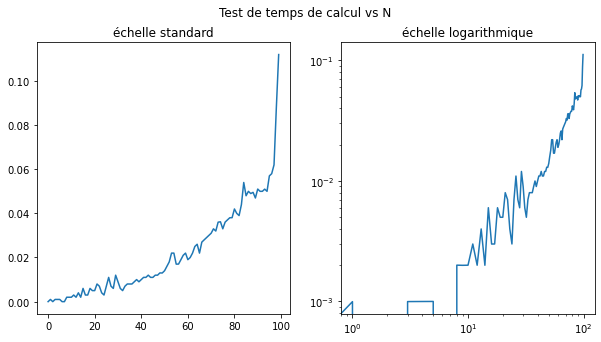

In [358]:
import random
T1=[]
N =np.arange(0,100)
for i in N:
    A=np.random.rand(i,i)#création des matrices aléatoires pour tester la fonction QRfactGS()
    start_time = time.time()
    QRfactGS(A)
    T1.append(time.time() - start_time)

fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Test de temps de calcul vs N ')
axs[0].plot(N,T1)
axs[0].set_title("échelle standard")
axs[1].loglog(N,T1)
axs[1].set_title("échelle logarithmique")
plt.show()

<h2> Méthode de Householder</h2>

On appelle matrice de Householder associée à un vecteur unitaire $v \in \mathbb{R}^n$ la matrice :
\begin{equation*}
H_v = I_n - 2 \,  \dfrac{ v \, ^tv}{|v|^2}
\end{equation*}
D'un point géométrique, cette matrice représente une symétrie par rapport au plan orthogonal à $v$. 


1- Vérifier que toute matrice de Householder est orthogonale et symétrique


Pour tout $v \in \mathbb{R}^n$, on a $H_v = I_n - 2 \,  \dfrac{ v \, ^tv}{|v|^2}$ alors $\,^tH_v=I_n - 2 \,  \dfrac{ v \, ^tv}{|v|^2}=H_v~$ donc $~H_v~$est symétrique. $\newline$
on vérifie que $H_v.H_v=I_n$

\begin{align*}
H_v.H_v & = (I_n - 2 \,  \dfrac{ v \, ^tv}{|v|^2})(I_n - 2 \,  \dfrac{ v \, ^tv}{|v|^2})\\
& =I_n -2 \,  \dfrac{ v \, ^tv}{|v|^2} - 2 \,  \dfrac{ v \, ^tv}{|v|^2} + 4\dfrac{ v \, ^tv v \, ^tv }{|v|^4}\\
&=I_n - 4 \,  \dfrac{ v \, ^tv}{|v|^2} + 4\dfrac{v|v|^2 \,^tv}{|v|^4}\\
&=I_n -  4 \,  \dfrac{ v \, ^tv}{|v|^2} + 4 \,  \dfrac{ v \, ^tv}{|v|^2}\\
&=I_n
\end{align*}
Alors $H_v$ est orthogonal 

In [359]:
# on va créer une fonnction householder_trans(), qui definit une matrice de Householder orthogonale et symétrique
#on va l'utiliser dans les prochaines questions  
def householder_trans(v):
    t=len(v)
    I=np.eye(t)
    c=np.dot(v,v.T)/(np.linalg.norm(v)**2)
    H=I -2*c
    return H

In [360]:
#test
z=np.array([[0],[1],[0]]) #vecteur unitaire
d=householder_trans(z)
#d matrice symétrique
print(d  == d.T)
#d matrice orthogonale 
np.dot(d,d.T)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2- Soit $u \in \mathbb{R}^n$, déterminer un vecteur unitaire $v \in \mathbb{R}^n$ de telle sorte que: 
\begin{equation*}
H_v u = |u|e_1 \, ,
\end{equation*}
où $e_1=(1,0,...,0)$.


On pose $v=\dfrac{u-|u|e_1}{|u-|u|e_1|}$ donc $\, ^tv=\dfrac{\, ^tu-|u|\, ^te_1)}{|u-|u|e_1|}$ avec $u=\begin{pmatrix}
u_1 \\
\vdots \\
u_n \\
\end{pmatrix}$
,après on va calculer $\, ^tvv$ $$\begin{align*}
&\, ^tvv=\dfrac{(\, ^tu-|u|\, ^te_1)(u-|u|e_1)}{|u-|u|e_1|^{2}} \\
&=\dfrac{\, ^tuu-|u|\, ^tue_1-|u|\, ^te_1u+|u|^{2}\, ^te_1e_1}{|u-|u|e_1|^{2}} \\
&=\dfrac{2(|u|^{2}-|u|u\, ^te_1)}{|u-|u|e_1|^2}\\
&=\dfrac{2\, ^tvu}{|u-|u|e_1|}
\end{align*}$$
Alors $H_v.u$ = $u-2v\dfrac{\, ^tvu}{\, ^tvv}$ et d'après le calcule précédent on a  $~2 \, ^tvu=|u-|u|e_1|\,^tvv$ donc $H_v.u=u-v|u-|u|e_1| $ ainsi $H_v.u=u-u+|u|e_1=|u|e_1$  


In [361]:
#pour verifier que la norme de v égale à 1 on définit la fonction trouver()
#on va l'utiliser dans la 3ème question 
def trouver(u):
    n=len(u)
    e1=np.eye(1,n)
    un=np.linalg.norm(u)
    z=np.linalg.norm(u-un*e1)
    v=(u-un*e1)/z
    return v


In [362]:
b=trouver(np.array([1,2,3]))
np.linalg.norm(b)
#donc b est unitaire 

1.0






<p>Le principe de la méthode de Householder est le suivant. Considérons $A=(v_1,v_2,...,v_n)$. On commence par factoriser $A$ à l'aide de la matrice de Householder $H_1$ permettant de transformer $v_1$ en $|v_1| e_1$ :</p>
\begin{equation*}
A= H_1  \begin{pmatrix} \star & ... & ... s & ... \\ 0 &  & &  \\ \vdots & & A_1 & \\ 0 & & & \end{pmatrix}
\end{equation*}
<p>On détermine alors la matrice de Householder $H_2$ permettant de transformer la première colonne de la sous-matrice $A_1$ de la même manière que précédemment. On a alors</p>
\begin{equation*}
 A= \begin{pmatrix} 1 & 0 & ... & 0 \\ 0 &   & &  \\ \vdots & & H_2 & \\ 0 & & & \end{pmatrix} H_1  \, \begin{pmatrix} \star & ... & ... & ... & ... \\ 0 & \star & ... & ... & ...  \\  0 & 0 & & \\ \vdots & \vdots & &  A_2 & \\ 0 &0 & & & \end{pmatrix}
\end{equation*}
<p>On continue ce procédé jusqu'à obtenir une matrice triangulaire supérieure. Notons bien que chacune des matrices :</p>
\begin{equation*}
\begin{pmatrix} I_k & 0 \\ 0 & H_{k+1} \end{pmatrix}
\end{equation*}
<p>est orthogonale, ainsi leur produit est la matrice orthogonale $Q$ rechechée.</p>

3- Ecrire une fonction en python <i>H=Householder(A)</i> qui retourne la matrice de Householder permettant de tranformer la première colonne de $A$ en $(1,0,...,0)$.

In [363]:
#code
def Householder(A):
    (n,m)=A.shape
    u=A[:,0]
    v=trouver(u).reshape(n,1) #la fonction prend un matrice colonne de taille (n,1) 
    return householder_trans(v)

In [364]:
#test
A=np.array([[1,4,5],[2,3,1],[3,6,5]])
z=Householder(A)
#on fait le produit matricielle entre la matrice de Householder et A 
np.dot(z,A)

array([[ 3.74165739e+00,  7.48331477e+00,  5.87974732e+00],
       [ 0.00000000e+00,  4.58971504e-01,  3.58236863e-01],
       [-1.11022302e-16,  2.18845726e+00,  4.03735530e+00]])

4- Ecrire une fonction en python <i>(Q,R)=QRfactH(A)</i> qui réalise la factorisation QR avec la méthode de Householder.

In [365]:
#code
def  QRfactH(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()
    for k in range(0,n):
        w = R[k:, [k]]
        e1 = np.zeros_like(w)
        e1[0] = 1.0
        gama= np.linalg.norm(w)
        v = w + np.sign(w[0]) * gama * e1
        v /= np.linalg.norm(v)
        a_k=householder_trans(v)
        a_k = np.block([[np.eye(k), np.zeros((k, m - k))], [np.zeros((m - k, k)), a_k]])
        Q = np.dot(Q,a_k.T)
        R = np.dot(a_k,R)

    return Q, R

In [366]:
#test
A=np.array([[1,4,5],[2,3,1],[3,6,5]])
QRfactH(A)


(array([[-2.67261242e-01,  8.94427191e-01,  3.58568583e-01],
        [-5.34522484e-01, -4.47213595e-01,  7.17137166e-01],
        [-8.01783726e-01,  8.53411475e-17, -5.97614305e-01]]),
 array([[-3.74165739e+00, -7.48331477e+00, -5.87974732e+00],
        [ 4.28968391e-16,  2.23606798e+00,  4.02492236e+00],
        [-1.59772643e-16, -3.27877590e-18, -4.78091444e-01]]))

In [367]:
#TEST
vv=QRfactH(A)[0]
np.dot(vv,vv.T)
#matrice orthogonale

array([[ 1.00000000e+00,  1.73434913e-17, -1.84707541e-17],
       [ 1.73434913e-17,  1.00000000e+00, -1.58801176e-16],
       [-1.84707541e-17, -1.58801176e-16,  1.00000000e+00]])

In [368]:
#TEST
QRfactH(A)[1]
#matrice traingulaire sup

array([[-3.74165739e+00, -7.48331477e+00, -5.87974732e+00],
       [ 4.28968391e-16,  2.23606798e+00,  4.02492236e+00],
       [-1.59772643e-16, -3.27877590e-18, -4.78091444e-01]])

5- Combien d'opérations, en fonction de $n$ sont-elles nécessaires pour exécuter l'algorithme ? Ce nombre d'opérations se répercute-t-il sur le temps de calcul ?


Le nombre d'opération nécessaire pour exécuter l'algorithme :
$\sum_{k=1}^n 1=n$


In [369]:
#Test de temps
A=np.array([[1,4,5],[2,3,1],[3,6,5]])
import time 
start = time.time()

QRfactH(A)

end = time.time()
elapsed = end - start
elapsed


0.001996755599975586

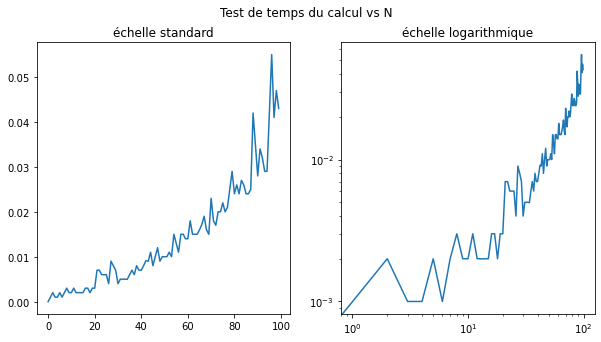

In [370]:
import random
T2=[]
N=np.arange(0,100)
for i in N:
    A=np.random.rand(i,i)#création des matrices aléatoires pour tester la fonction QRfactGS()
    start_time = time.time()
    QRfactH(A)
    T2.append(time.time() - start_time)

fig, axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Test de temps du calcul vs N')
axs[0].plot(N,T2)
axs[0].set_title('échelle standard')
axs[1].loglog(N,T2)
axs[1].set_title("échelle logarithmique")
plt.show()

On considère la matrice suivante :
\begin{equation*}
A_n = PD ~^t P
\end{equation*}
où P est la matrice de Hadamard de taille $N$ (divisée par $\sqrt{n}$ pour obtenir une matrice orthogonale) et $d_{kk}=10^{-k}$ avec $D$ diagonale. Il est possible d'obtenir la matrice de Hadamard de taille $N$ avec <i>scipy.linalg.hadamard</i> (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.hadamard.html}\medskip)


6- Montrer que $\text{cond}_2(A_n)=10^k$

On a $\text{cond}_2(A_n)=|||A_n||||||A_n^{-1}|||~$ avec |||.||| comme une  norme  matricielle et $|||A_n||| \leq |||P||||||D||||||\,^tP|||$ où $|||P|||=|||\,^tP|||=1$ car $P$ est orthogonale. $\newline$
On sait que $|||D|||=max_{||X||_2=1}||DX||_2$ et $||DX||_2=max_{k=1...n}|d_{kk}|~||X||_2=max_{k=1...n} 10^{-k}=10^{-1}$ donc$~|||A_n|||=10^{-1}~$ et par la même méthode on en déduit que $~|||A_n^{-1}|||=10^{n}~$.$\newline$
Donc $\text{cond}_2(A_n)=10^{n}10^{-1}=10^{n-1}$.

7- On définit de défaut d'orthogonalité d'une matrice $Q$ par : $||I-Q^tQ||$. Etudier, en fonction de $n$ le défaut d'orthogonalité sur $A_n$ donné par la matrice $Q$ obtenue successivement avec la méthode de Gram-Schmidt et de Householder. Qu'en déduit-on ?

In [346]:
#code
def alia(A):
    n,m=A.shape
    I=np.eye(n)
    p=np.dot(A.T,A)
    z=np.linalg.norm(I-p)
    return z

In [347]:
#test methode Gram-Schmid
A=np.array([[1,4,5],[2,3,1],[3,6,5]])
a=QRfactGS(A)[0]
alia(a)

7.407962035494264e-15

In [348]:
#test methode Householder
b=QRfactH(A)[0]
alia(b)

3.608190312102367e-16

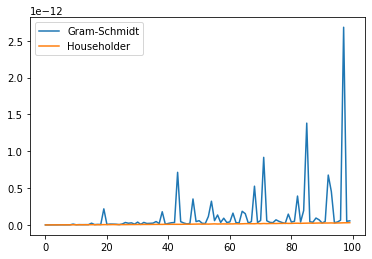

In [350]:
#representation graphique 
D=[]  
V=[]
for i in np.arange(0,100):
    A=np.random.rand(i,i)
    n=alia(QRfactH(A)[0])
    D.append(n)
    p=alia(QRfactGS(A)[0])
    V.append(p)
N=np.arange(0,100)
plt.plot(N,V,label="Gram-Schmidt")
plt.plot(N,D,label="Householder")
plt.legend()
plt.show()